In [1]:

import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
# Add the scripts directory to the Python path
sys.path.append(os.path.abspath(os.path.join("..", "scripts")))
from plot import (
    plot_histogram, 
    plot_scatter, 
    plot_time_series, 
    plot_boxplot,
    plot_correlation_matrix
)

# Now you can import the functions
from utils import (
    read_csv_file,
    calculate_summary_statistics,
    calculate_correlation_matrix,
    detect_outliers,
    convert_to_datetime,
    calculate_daily_returns,
    calculate_moving_average,
)



# Load the CSV file into a DataFrame
data_info = read_csv_file("Data/yfinance_data/META_historical_data.csv")
df = data_info["data"]
print("Row count: ",data_info["row_count"])

Row count:  2926


Summary Statistics:
                                 Date         Open         High          Low  \
count                           2926  2926.000000  2926.000000  2926.000000   
mean   2018-10-05 02:21:14.641148160   179.557215   181.875331   177.317761   
min              2012-12-12 00:00:00    22.990000    23.090000    22.670000   
25%              2015-11-06 18:00:00    97.767502    98.772499    95.889997   
50%              2018-10-03 12:00:00   166.870003   168.850006   164.210007   
75%              2021-08-30 18:00:00   231.450005   234.934998   228.687504   
max              2024-07-30 00:00:00   542.349976   542.809998   528.359985   
std                              NaN   108.864895   110.256219   107.511134   

             Close    Adj Close        Volume    Dividends  Stock Splits  
count  2926.000000  2926.000000  2.926000e+03  2926.000000        2926.0  
mean    179.649453   179.305921  2.872083e+07     0.000342           0.0  
min      22.900000    22.853037  5.467500e

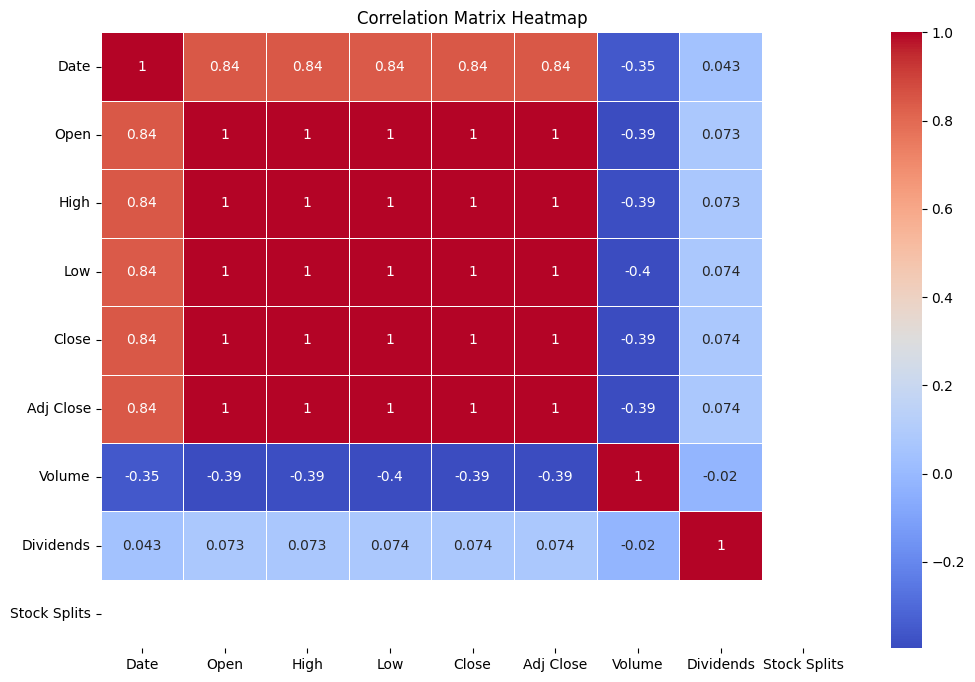

Outliers in 'Close' column:
            Date        Open        High         Low       Close   Adj Close  \
2803 2024-02-02  459.600006  485.959991  453.010010  474.989990  474.015930   
2804 2024-02-05  469.880005  471.899994  459.220001  459.410004  458.467865   
2805 2024-02-06  464.000000  467.119995  453.000000  454.720001  453.787506   
2806 2024-02-07  458.000000  471.519989  456.179993  469.589996  468.626984   
2807 2024-02-08  468.320007  470.589996  465.029999  470.000000  469.036163   
...         ...         ...         ...         ...         ...         ...   
2921 2024-07-24  472.309998  476.299988  460.579987  461.269989  461.269989   
2922 2024-07-25  463.260010  463.549988  442.649994  453.410004  453.410004   
2923 2024-07-26  464.200012  469.769989  459.420013  465.700012  465.700012   
2924 2024-07-29  469.880005  473.959991  465.019989  465.709991  465.709991   
2925 2024-07-30  467.000000  472.730011  456.700012  463.190002  463.190002   

        Volume  Divide

In [2]:
# Convert 'Date' column to datetime
data = convert_to_datetime(df, 'Date')

# Calculate summary statistics
summary_stats = calculate_summary_statistics(data)
print("Summary Statistics:\n", summary_stats)

# Calculate correlation matrix
correlation_matrix = calculate_correlation_matrix(data)
print("Correlation Matrix:\n", correlation_matrix)
plot_correlation_matrix(data)
# Detect outliers in the 'Close' column
outliers = detect_outliers(data, 'Close')
print("Outliers in 'Close' column:\n", outliers)

# Calculate daily returns for the 'Close' column
data = calculate_daily_returns(data, 'Close')
print("Daily Returns:\n", data[['Date', 'Close', 'Daily_Returns']].head())

# Calculate 20-day moving average for the 'Close' column
data = calculate_moving_average(data, 'Close', 20)
print("20-day Moving Average:\n", data[['Date', 'Close', 'MA_20']].head())

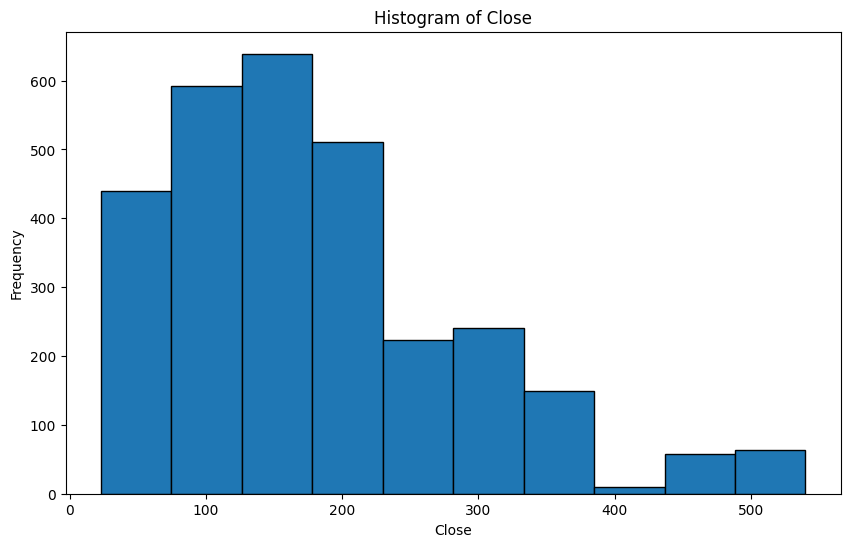

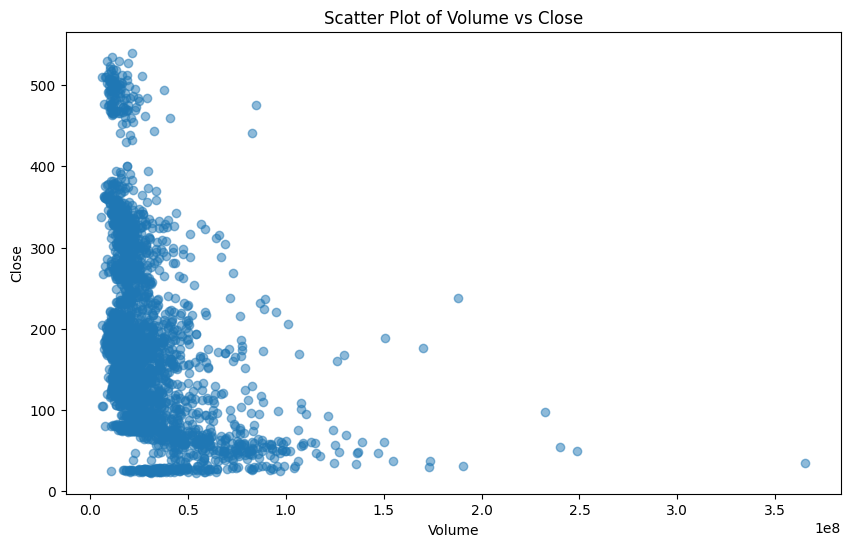

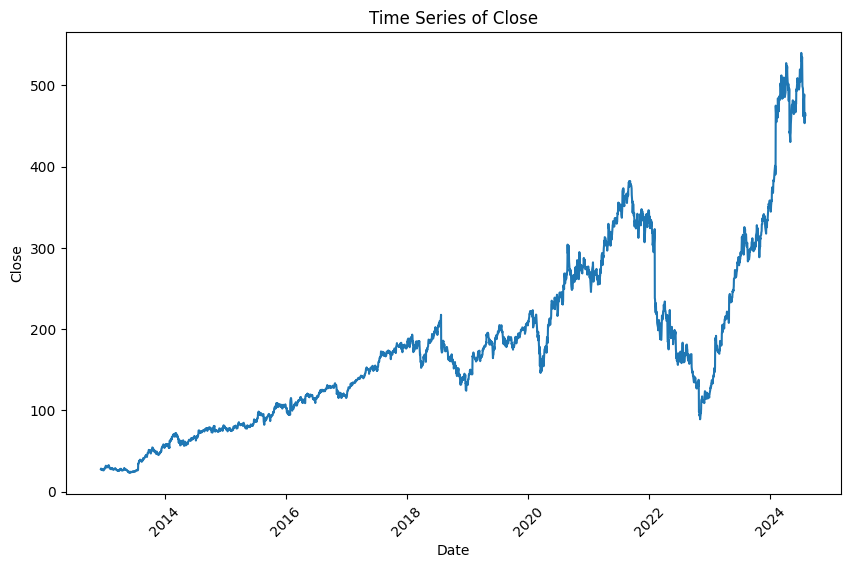

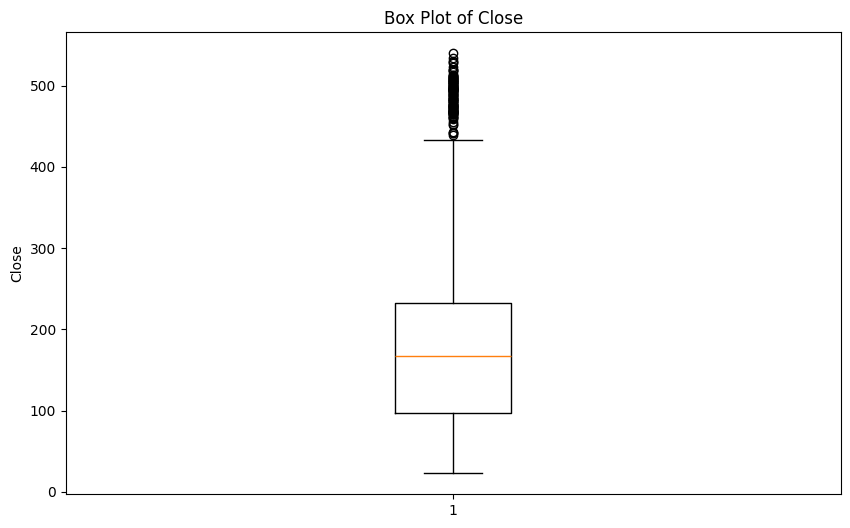

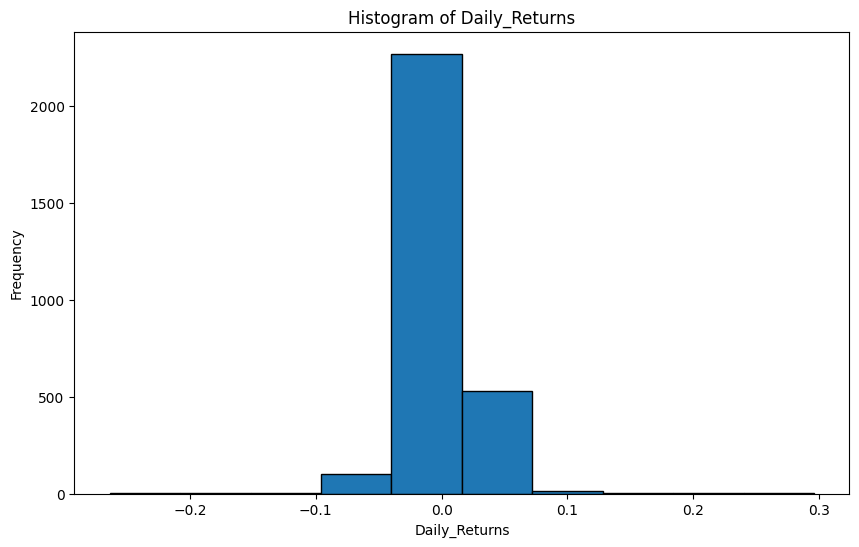

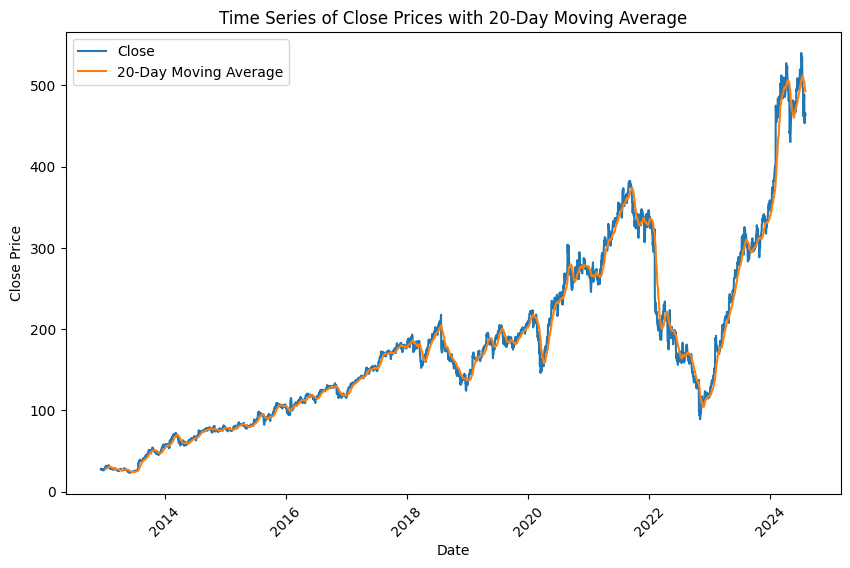

In [3]:

# Convert 'Date' column to datetime
data = convert_to_datetime(data, 'Date')

# Plot histogram of 'Close' prices
plot_histogram(data, 'Close')

# Plot scatter plot of 'Volume' vs 'Close'
plot_scatter(data, 'Volume', 'Close')

# Plot time series of 'Close' prices
plot_time_series(data, 'Date', 'Close')

# Plot box plot of 'Close' prices
plot_boxplot(data, 'Close')

# Calculate daily returns for the 'Close' column
data = calculate_daily_returns(data, 'Close')

# Plot histogram of daily returns
plot_histogram(data, 'Daily_Returns')

# Calculate 20-day moving average for the 'Close' column
data = calculate_moving_average(data, 'Close', 20)

# Plot time series of 'Close' prices with 20-day moving average
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Close'], label='Close')
plt.plot(data['Date'], data['MA_20'], label='20-Day Moving Average')
plt.title('Time Series of Close Prices with 20-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.xticks(rotation=45)
plt.show()
